In [2]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing course datasets as DataFrames
belmont = pd.read_csv('../datasets/belmont.csv')
michelson = pd.read_csv('../datasets/michelson_speed_of_light.csv', index_col=0)
all_states = pd.read_csv('../datasets/2008_all_states.csv')
swing_states = pd.read_csv('../datasets/2008_swing_states.csv')
flowers = pd.read_csv('../datasets/flowers.csv')

# Random number generators and hacker statistics

### Generating random numbers using the np.random module

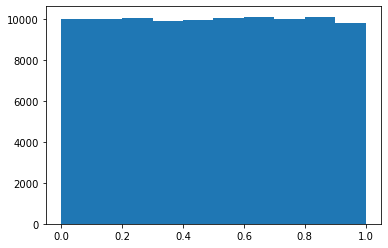

In [3]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
entries = 100000
random_numbers = np.empty(entries)

# Generate random numbers by looping over range(100000)
for i in range(entries):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


### The np.random module and Bernoulli trials

In [4]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

AttributeError: 'Rectangle' object has no property 'normed'

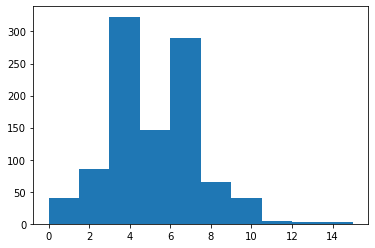

In [5]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
entries = 1000
n_defaults = np.empty(entries)

trials = 100
probability=0.05

# Compute the number of defaults
for i in range(entries):
    n_defaults[i] = perform_bernoulli_trials(n=trials, p=probability)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

### Will the bank fail?

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


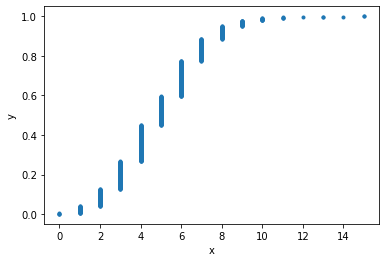

Probability of losing money = 0.022


In [8]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


# Probability distributions and stories: The Binomial distribution

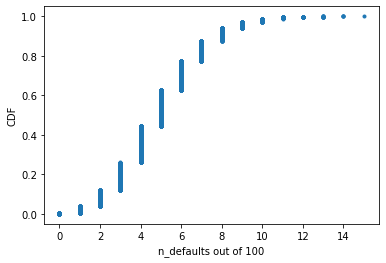

In [12]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n = 100
p = 0.05
size = 10000
n_defaults = np.random.binomial(n=n, p=p, size=size)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel(f'n_defaults out of {n}')
plt.ylabel('CDF')

# Show the plot
plt.show()


### Plotting the Binomial PMF

AttributeError: 'Rectangle' object has no property 'normed'

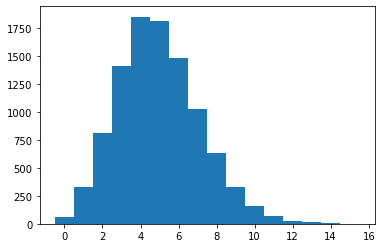

In [13]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins, normed=True)

# Label axes
plt.xlabel('defaults')
plt.ylabel('PMF')


# Show the plot
plt.show()

# Poisson processes and the Poisson distribution

### Relationship between Binomial and Poisson distributions

In [16]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples = 10000
samples_poisson = np.random.poisson(lam=10, size=samples)

# Print the mean and standard deviation
print('Poisson:     ',
      np.mean(samples_poisson),
      np.std(samples_poisson)
      )

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n=n[i], p=p[i], size=samples)

    # Print results
    print('n =', n[i],
          'Binom:',
          np.mean(samples_binomial),
          np.std(samples_binomial)
          )


Poisson:      10.0119 3.1418717971935135
n = 20 Binom: 9.9911 2.234193543540935
n = 100 Binom: 10.0305 3.007452368700126
n = 1000 Binom: 10.0605 3.1363417782505785


### Was 2015 anomalous?

In [17]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
samples = 10000
n_nohitters = np.random.poisson(lam=251/115, size=samples)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / samples

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0061
